# Data Exploration

Features: BLOCK; LOT; EASEMENT; BUILDING CLASS AT PRESENT; YEAR BUILT

Target Variable: SALE PRICE

Zhuoyuan Xu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
manhattan = pd.read_excel('rollingsales_manhattan.xls', skiprows = [0, 1, 2, 3])
bronx = pd.read_excel('rollingsales_bronx.xls', skiprows = [0, 1, 2, 3])
queens = pd.read_excel('rollingsales_queens.xls', skiprows = [0, 1, 2, 3])
brooklyn = pd.read_excel('rollingsales_brooklyn.xls', skiprows = [0, 1, 2, 3])
statenisland = pd.read_excel('rollingsales_statenisland.xls', skiprows = [0, 1, 2, 3])
df = pd.concat([manhattan, bronx,queens, brooklyn, statenisland], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64400 entries, 0 to 64399
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         64400 non-null  int64         
 1   NEIGHBORHOOD                    64400 non-null  object        
 2   BUILDING CLASS CATEGORY         64400 non-null  object        
 3   TAX CLASS AT PRESENT            64366 non-null  object        
 4   BLOCK                           64400 non-null  int64         
 5   LOT                             64400 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       64366 non-null  object        
 8   ADDRESS                         64400 non-null  object        
 9   APARTMENT NUMBER                14445 non-null  object        
 10  ZIP CODE                        64400 non-null  int64         
 11  RE

In [ ]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,64400.000000,64400.000000,64400.000000,0.0,64400.000000,50530.000000,39669.000000,52206.000000,3.799300e+04,3.799500e+04,59801.000000,64400.000000,6.440000e+04
mean,3.034503,4434.825124,363.556863,NaN,10872.494425,2.671284,0.640727,3.072386,1.918481e+04,7.293534e+03,1950.827177,1.609643,1.398147e+06
std,1.266119,3660.376178,665.082091,NaN,554.858228,41.616553,9.831398,42.025587,1.129136e+06,7.742149e+04,35.076411,0.800819,1.079702e+07
min,1.000000,1.000000,1.000000,NaN,10001.000000,0.000000,-16.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,2.000000,1367.000000,22.000000,NaN,10308.000000,1.000000,0.000000,1.000000,2.000000e+03,1.352000e+03,1925.000000,1.000000,0.000000e+00
50%,3.000000,3581.000000,50.000000,NaN,11211.000000,1.000000,0.000000,1.000000,2.500000e+03,1.922000e+03,1945.000000,1.000000,4.500000e+05
75%,4.000000,6587.000000,360.000000,NaN,11358.000000,2.000000,0.000000,2.000000,4.000000e+03,2.754000e+03,1971.000000,2.000000,8.600000e+05
max,5.000000,16350.000000,9116.000000,NaN,11697.000000,8764.000000,259.000000,8812.000000,2.147557e+08,8.942176e+06,2020.000000,4.000000,9.780904e+08


In [ ]:
for each in df.columns:
    print(each,df[each].nunique())

BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 45
TAX CLASS AT PRESENT 13
BLOCK 11261
LOT 2387
EASE-MENT 0
BUILDING CLASS AT PRESENT 156
ADDRESS 62286
APARTMENT NUMBER 3294
ZIP CODE 191
RESIDENTIAL UNITS 147
COMMERCIAL UNITS 57
TOTAL UNITS 157
LAND SQUARE FEET 5456
GROSS SQUARE FEET 5113
YEAR BUILT 158
TAX CLASS AT TIME OF SALE 3
BUILDING CLASS AT TIME OF SALE 158
SALE PRICE 7290
SALE DATE 366


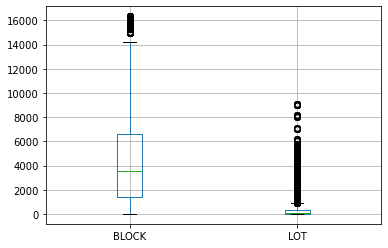

In [ ]:
df[['BLOCK', 'LOT']].boxplot()

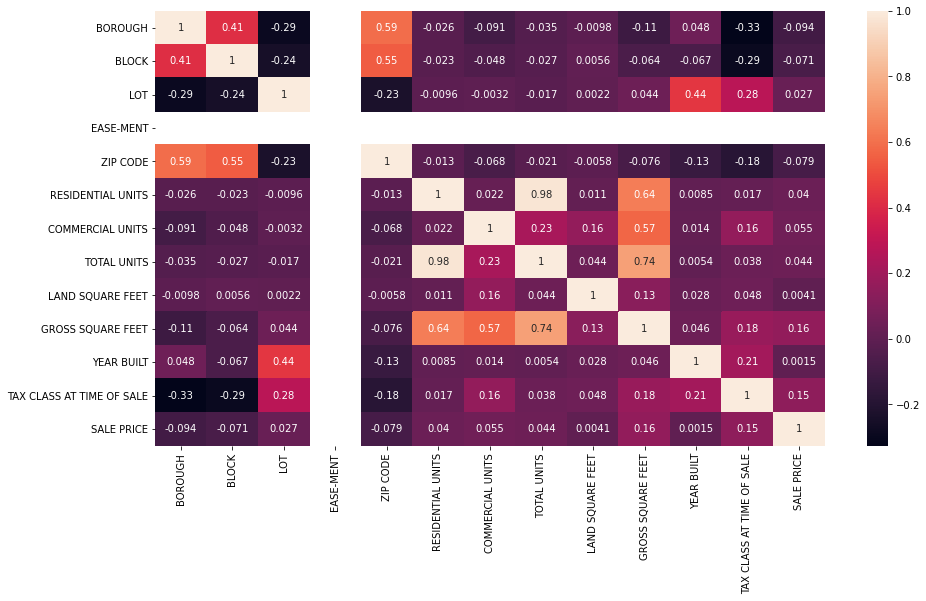

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Block

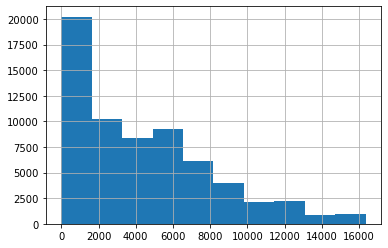

In [ ]:
df['BLOCK'].hist()

In [ ]:
#df[df['BLOCK'] < 2000].nunique()
df[df['BLOCK'] > 8000].nunique()

BOROUGH                               3
NEIGHBORHOOD                         47
BUILDING CLASS CATEGORY              38
TAX CLASS AT PRESENT                  9
BLOCK                              3953
LOT                                 794
EASE-MENT                             0
BUILDING CLASS AT PRESENT           100
ADDRESS                           10160
APARTMENT NUMBER                    348
ZIP CODE                             42
RESIDENTIAL UNITS                    28
COMMERCIAL UNITS                     14
TOTAL UNITS                          32
LAND SQUARE FEET                   1993
GROSS SQUARE FEET                  1993
YEAR BUILT                          109
TAX CLASS AT TIME OF SALE             3
BUILDING CLASS AT TIME OF SALE      100
SALE PRICE                         1560
SALE DATE                           343
dtype: int64

When block number is very large, only 3 borough. Other data does not change much.

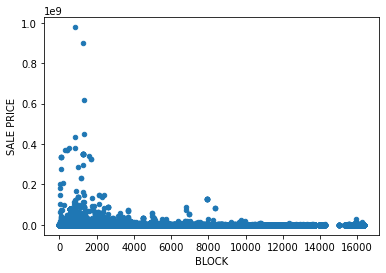

In [ ]:
df.plot.scatter(x = 'BLOCK', y = 'SALE PRICE')

# LOT

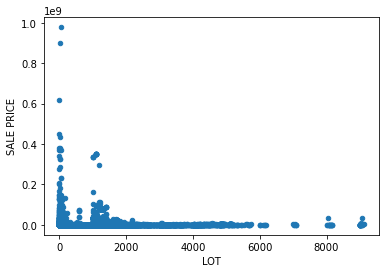

In [ ]:
df.plot.scatter(x = 'LOT', y = 'SALE PRICE')

# YEAR BUILT

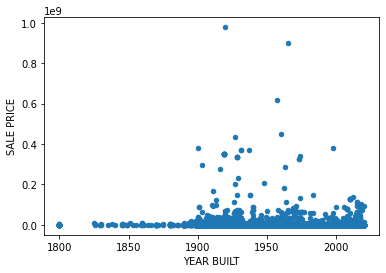

In [ ]:
df.plot.scatter(x = 'YEAR BUILT', y = 'SALE PRICE')

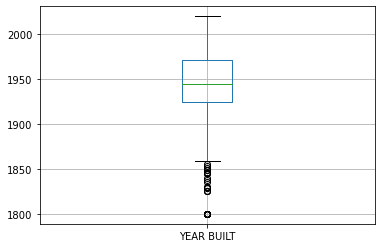

In [ ]:
df[['YEAR BUILT']].boxplot()

# CLASS AT PRESENT

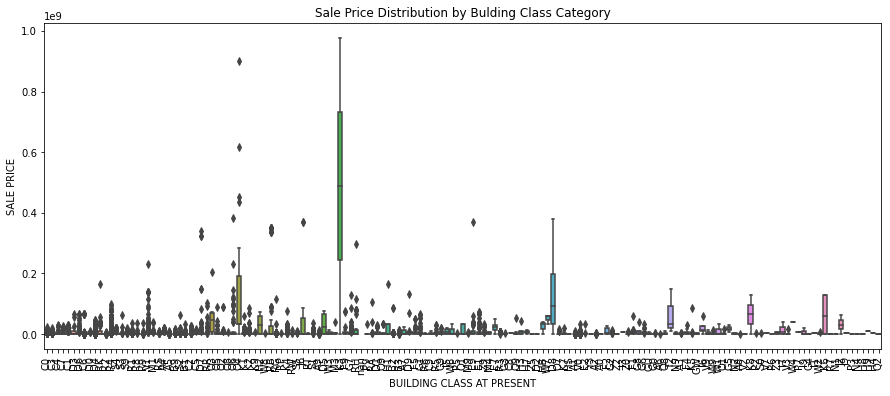

In [ ]:
plt.figure(figsize=(15,6))
order = df['BUILDING CLASS AT PRESENT'].unique()
sns.boxplot(x='BUILDING CLASS AT PRESENT', y='SALE PRICE', data=df, order = order)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.loc[df['SALE PRICE'].idxmax()]

BOROUGH                                             1
NEIGHBORHOOD                                  FASHION
BUILDING CLASS CATEGORY            22 STORE BUILDINGS
TAX CLASS AT PRESENT                                4
BLOCK                                             840
LOT                                                42
EASE-MENT                                         NaN
BUILDING CLASS AT PRESENT                          K3
ADDRESS                              424/434 5 AVENUE
APARTMENT NUMBER                                  NaN
ZIP CODE                                        10018
RESIDENTIAL UNITS                                   0
COMMERCIAL UNITS                                    4
TOTAL UNITS                                         4
LAND SQUARE FEET                                51271
GROSS SQUARE FEET                              697029
YEAR BUILT                                       1920
TAX CLASS AT TIME OF SALE                           4
BUILDING CLASS AT TIME OF SA

In [ ]:
df[df['BUILDING CLASS AT PRESENT'] == 'K3']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1329,1,FASHION,22 STORE BUILDINGS,4,840,42,NaN,K3,424/434 5 AVENUE,NaN,...,0.0,4.0,4.0,51271.0,697029.0,1920.0,4,K3,978090439,2020-03-12
15682,2,MOTT HAVEN/PORT MORRIS,22 STORE BUILDINGS,4,2327,64,NaN,K3,2825 3 AVENUE,NaN,...,0.0,9.0,9.0,12433.0,54000.0,1991.0,4,K3,0,2019-10-18
